## Predicción del consumo de gasolina usando TensorFlow

### Importar librerías

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Descargar el conjunto de datos

In [67]:
data = pd.read_csv('petrol_consumption.csv')

### Exploración de los datos

In [68]:
data.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [69]:
# Obtenga el tamaño del dataset (número de ejemplos y número de características) con la función shape
data.shape
# Visualice el DataFrame con la función head(), tail() o sample()
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [70]:
# Características
X = data.iloc[:, 0:4]
X.shape

(48, 4)

In [71]:
# Objetivo
y = data.Petrol_Consumption
y.shape

(48,)

In [72]:
# Separe el conjunto de datos en entrenamiento y prueba  (relación: 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (38, 4)
Tamaño del conjunto de datos de prueba:  (10, 4)


### Preprocesamiento de los datos

In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Definición del modelo

In [75]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dropout(0.1, seed=1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3, seed=2))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))
model.compile(loss='mse' , optimizer='adam', metrics=["mean_squared_error"])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Entrenamiento del modelo

In [78]:
es = EarlyStopping(monitor='val_loss', patience=50,  mode='min')

In [79]:
# Entrenamiento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,verbose=1, callbacks=[es],batch_size=16)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 360694.8438 - mean_squared_error: 360694.8438 - val_loss: 307694.5625 - val_mean_squared_error: 307694.5625
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 348976.4375 - mean_squared_error: 348976.4375 - val_loss: 307613.9062 - val_mean_squared_error: 307613.9062
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 352940.2188 - mean_squared_error: 352940.2188 - val_loss: 307535.8438 - val_mean_squared_error: 307535.8438
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 350150.5312 - mean_squared_error: 350150.5312 - val_loss: 307455.9062 - val_mean_squared_error: 307455.9062
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 352564.7188 - mean_squared_error: 352564.7188 - val_loss: 307370.8750 - val_mean_squared_error: 307370.8750
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 356031.5938 - mean_squared_error: 356031.5938 - val_loss: 307281.4062 - val_mean_squared_error: 307281.4062
E

### Evaluación del modelo

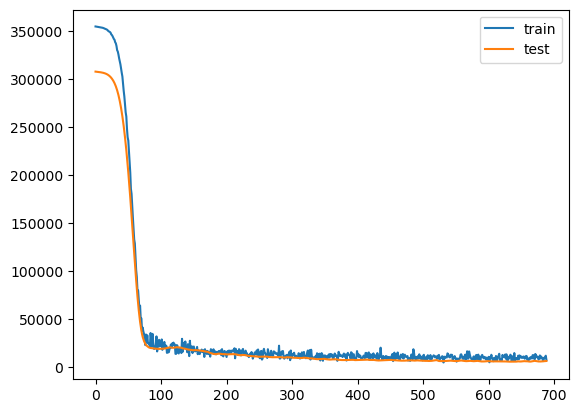

In [80]:
# Ploteando training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [81]:
# Error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
77.37562515365242


In [82]:
y_pred.flatten()

array([586.1077 , 510.06488, 599.07263, 583.44574, 692.14935, 620.96826,
       579.6824 , 620.5842 , 449.4543 , 452.2496 ], dtype=float32)

In [83]:
y_test

29    534
4     410
26    577
30    571
32    577
37    704
34    487
40    587
7     467
10    580
Name: Petrol_Consumption, dtype: int64

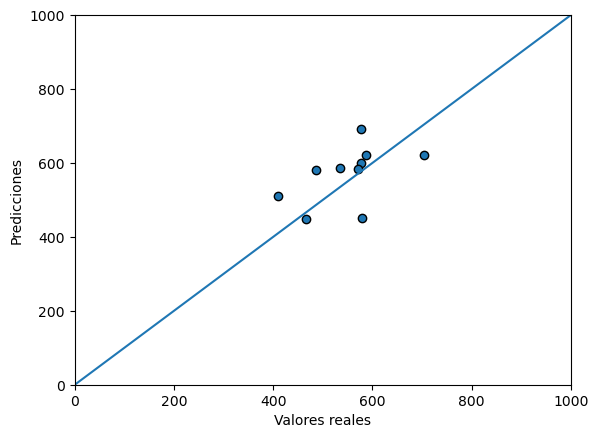

In [84]:
# Comparando predicciones vs valores reales
plt.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

### Realizar una predicción

In [85]:
new_value = [8.0, 3448, 5399, 0.5]
# Escalar la nueva observación
new_value = sc.transform([new_value])
# Utilizar predict para predecir la nueva observación
prediction = model.predict(new_value)
print('Predicción: ', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción:  [[579.5605]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Activity

Modify the hyperparameters and/or architecture in order to improve the current results.